In [3]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

Загрузка данных и вывод информации

In [4]:
df=pd.read_csv(r"C:\Users\arina.borisova\Desktop\AD\ORGANICS.csv",encoding="cp1251")
print(df.shape)
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


Вывод количества пропущенных значений

In [5]:
df.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [6]:
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


Замена пропущенных значений на 0

In [7]:
df1=df.fillna(0)

In [8]:
df2=df.fillna(df.mean())

In [9]:
df3 = df.dropna()

Выделяем целевую переменную

In [10]:
x=df1[["DemAffl", "DemAge", "DemCluster", "PromSpend", "PromTime"]]
y=df1.values[::,11]
y

array([0, 0, 1, ..., 0, 0, 0], dtype=object)

Деление на тестовую выборку и тренировочную выборку

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
y_train=y_train.astype('int')

In [13]:
y_test=y_test.astype('int')

Создание и построение дерева

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
from sklearn.tree import export_graphviz
import subprocess

Построение графиков

In [16]:
export_graphviz(tree, out_file='C:/Users/arina.borisova/Desktop/AD/Organics_tree.dot',
rounded = True, proportion = False,
precision = 2, filled = True)

In [30]:
import pydot
(graph,) = pydot.graph_from_dot_file('C:/Users/arina.borisova/Desktop/AD/Organics_tree.dot')
graph.write_png('C:/Users/arina.borisova/Desktop/AD/Organics_tree.png')

Оценки для тренировочной и тестовой выборок

In [18]:
tree.score(X_train, y_train)

0.7931344818719465

In [19]:
tree.score(X_test, y_test)

0.7976601169941503

In [20]:
print(tree.min_samples_leaf)
print(tree.max_features)

1
None


In [21]:
max_depth_values = range(1, 12)

In [22]:
scores_data = pd.DataFrame()

Вывод оценок в зависимости от глубины

In [23]:
for max_depth in max_depth_values:    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': test_score})
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data

,max_depth,train_score,test_score
0,1,0.751736,0.753562
0,2,0.785678,0.792860
0,3,0.790177,0.796310
0,4,0.793070,0.797210
0,5,0.800334,0.803060
0,6,0.803163,0.801860
0,7,0.807984,0.801260
0,8,0.810877,0.796760
0,9,0.816020,0.795710
0,10,0.823412,0.793610


In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name = 'set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.751736
1,2,train_score,0.785678
2,3,train_score,0.790177
3,4,train_score,0.793070
4,5,train_score,0.800334
5,6,train_score,0.803163
6,7,train_score,0.807984
7,8,train_score,0.810877
8,9,train_score,0.816020
9,10,train_score,0.823412


Зависимость оценки от максимальной глубины

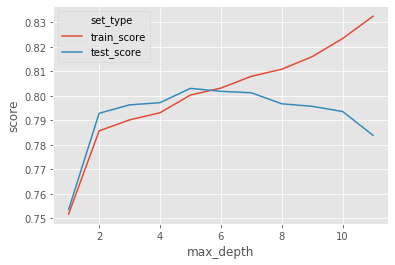

In [29]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

Вывод:
При увеличении глубины оценка для тестовой выборки с определенного момента начинает уменьшаться, а для тренировочной выборки - увеличиваться. Поэтому оптимальной является глубина 5, так как при данном значении глубины оценки примерно одинаковы.